In [1]:
repo_name = 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'
repo_url = f'https://github.com/daivik05/{repo_name}'
!git clone $repo_url
project_dir = f'/content/{repo_name}'
%cd $project_dir

Cloning into 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'...
remote: Enumerating objects: 4751, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 4751 (delta 2), reused 0 (delta 0), pack-reused 4742 (from 1)
Receiving objects: 100% (4751/4751), 1.61 GiB | 29.58 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (4723/4723), done.
/content/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation


In [2]:
from google.colab import files

# Upload the model file and class indices file
uploaded = files.upload()

Saving plant_disease_cnn_model.keras to plant_disease_cnn_model.keras


In [ ]:
# prompt: i want to test the model in a different collab notebook what should i do, i have already downloaded the model , i need the code to test it

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np


# Load the saved model
model = tf.keras.models.load_model('plant_disease_cnn_model.keras')

def predict_disease(image_path):
  img = image.load_img(image_path, target_size=(256, 256))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  predicted_class_index = np.argmax(prediction)

  # Replace with the actual class labels used during training
  class_labels = ['corn_Blight','corn_Common_Rust','corn_Gray_Leaf_Spot','corn_Healthy','rice_Bacterial leaf blight','rice_Brown spot','rice_Leaf smut','wheat_leaf_Healthy','wheat_leaf_septoria','wheat_leaf_stripe_rust']

  predicted_class = class_labels[predicted_class_index]

  return predicted_class

# Example usage:
image_path = 'train/corn_Common_Rust/Corn_Common_Rust (1006).JPG'  # Replace with the path to your test image
predicted_disease = predict_disease(image_path)
print(f"Predicted Disease: {predicted_disease}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Predicted Disease: corn_Common_Rust


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Define functions for segmentation, percentage calculation, and prediction
def segment_disease(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    return binary_mask

def calculate_percentage_affected(mask):
    total_pixels = mask.shape[0] * mask.shape[1]
    affected_pixels = np.count_nonzero(mask)
    percentage_affected = 100 - (affected_pixels / total_pixels) * 100
    return percentage_affected

def segment_predict_and_calculate_percentage(img_path, model, class_labels):
    img = cv2.imread(img_path)
    disease_mask = segment_disease(img)
    percentage_affected = calculate_percentage_affected(disease_mask)

    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions[0])]

    return predicted_class, percentage_affected

# Load the trained model
model = tf.keras.models.load_model('plant_disease_cnn_model.keras')

# Define class labels
class_labels = ['corn_Blight', 'corn_Common_Rust', 'corn_Gray_Leaf_Spot', 'corn_Healthy',
                'rice_Bacterial leaf blight', 'rice_Brown spot', 'rice_Leaf smut',
                'wheat_leaf_Healthy', 'wheat_leaf_septoria', 'wheat_leaf_stripe_rust']

# Test the function
img_path = "train/rice_Leaf smut/DSC_0293.JPG"
predicted_class, percentage_affected = segment_predict_and_calculate_percentage(img_path, model, class_labels)
print("Predicted Class:", predicted_class)
print("Percentage of Affected Area:", percentage_affected)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
Predicted Class: rice_Leaf smut
Percentage of Affected Area: 1.056498689960435


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Predicted Class: wheat_leaf_stripe_rust
Percentage of Affected Area: 11.510588200090144 %

Treatment Recommendations:
- Resistant Varieties: Use resistant wheat varieties.
- Fungicides: Prothioconazole. Apply 8-12 ounces per acre.
- Early Detection: Regularly monitor fields for early signs.
- Field Hygiene: Remove and destroy infected residues.


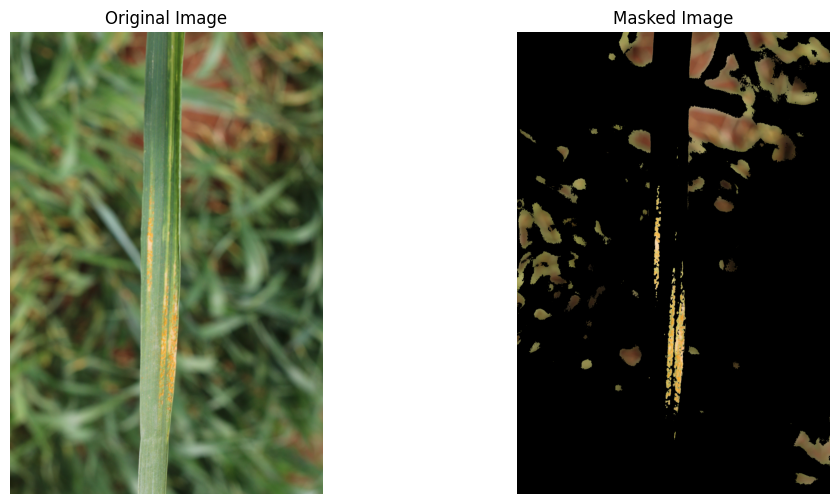

In [12]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained classification model
model = load_model('plant_disease_cnn_model.keras')

# Define treatment recommendations
treatments = {
    'corn_Blight': [
        "Resistant Varieties: Choose hybrid seeds with resistance to blight.",
        "Crop Rotation: Rotate crops annually to break the disease cycle.",
        "Fungicides: Chlorothalonil or Azoxystrobin. Apply 1-2 quarts per acre.",
        "Field Sanitation: Remove and destroy infected residues."
    ],
    'corn_Common_Rust': [
        "Resistant Varieties: Use resistant corn hybrids.",
        "Fungicides: Tebuconazole or Propiconazole. Apply 8-16 ounces per acre.",
        "Crop Rotation: Rotate with non-host crops."
    ],
    'corn_Gray_Leaf_Spot': [
        "Resistant Hybrids: Select hybrids resistant to gray leaf spot.",
        "Fungicides: Pyraclostrobin. Apply 6-12 ounces per acre.",
        "Field Sanitation: Remove infected residues and manage crop debris."
    ],
    'corn_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water based on crop needs.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'rice_Bacterial leaf blight': [
        "Resistant Varieties: Use varieties resistant to bacterial blight.",
        "Proper Fertilization: Balanced fertilizers like N-P-K, 150-200 pounds per acre.",
        "Seed Treatment: Streptomycin, 1-2 grams per liter of water.",
        "Field Sanitation: Remove infected plant debris manually."
    ],
    'rice_Brown spot': [
        "Resistant Varieties: Choose resistant varieties.",
        "Balanced Nutrition: Use 15-15-15 fertilizer, 200-300 pounds per acre.",
        "Fungicides: Carbendazim or Thiophanate-methyl. Apply 0.5-1 pound per acre.",
        "Water Management: Maintain proper water levels."
    ],
    'rice_Leaf smut': [
        "Resistant Varieties: Use resistant or tolerant varieties.",
        "Crop Rotation: Rotate with non-host crops.",
        "Fungicides: Generally not required unless severe. Follow specific product instructions.",
        "Good Agronomic Practices: Follow general crop management practices."
    ],
    'wheat_leaf_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water as needed.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'wheat_leaf_septoria': [
        "Resistant Varieties: Select resistant varieties.",
        "Crop Rotation and Residue Management: Rotate crops and manage residues.",
        "Fungicides: Epoxiconazole. Apply 8-16 ounces per acre.",
        "Field Monitoring: Regularly scout for early disease signs."
    ],
    'wheat_leaf_stripe_rust': [
        "Resistant Varieties: Use resistant wheat varieties.",
        "Fungicides: Prothioconazole. Apply 8-12 ounces per acre.",
        "Early Detection: Regularly monitor fields for early signs.",
        "Field Hygiene: Remove and destroy infected residues."
    ]
}

def segment_disease(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define color ranges for segmentation
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([10, 100, 20])
    upper_orange = np.array([20, 255, 255])
    lower_brown = np.array([10, 40, 40])
    upper_brown = np.array([20, 255, 255])

    # Create masks for each color
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

    # Combine masks
    combined_mask = mask_red | mask_yellow | mask_orange | mask_brown

    return combined_mask

def calculate_percentage_affected(mask):
    total_pixels = mask.size
    affected_pixels = np.count_nonzero(mask)
    percentage_affected = (affected_pixels / total_pixels) * 100
    return percentage_affected

def segment_predict_and_calculate_percentage(img_path, model, class_labels):
    img = cv2.imread(img_path)
    disease_mask = segment_disease(img)
    percentage_affected = calculate_percentage_affected(disease_mask)

    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class, percentage_affected

def get_treatment_recommendation(disease):
    return treatments.get(disease, ["No treatment information available."])

# Path to test image
img_path = 'train/wheat_leaf_stripe_rust/lolr(107).JPG'
class_labels = ['corn_Blight', 'corn_Common_Rust', 'corn_Gray_Leaf_Spot', 'corn_Healthy',
                 'rice_Bacterial leaf blight', 'rice_Brown spot', 'rice_Leaf smut',
                 'wheat_leaf_Healthy', 'wheat_leaf_septoria', 'wheat_leaf_stripe_rust']

# Make prediction and calculate percentage affected
predicted_class, percentage_affected = segment_predict_and_calculate_percentage(img_path, model, class_labels)
print("Predicted Class:", predicted_class)
print("Percentage of Affected Area:", percentage_affected,"%")

# Get treatment recommendation
treatment_recommendation = get_treatment_recommendation(predicted_class)
print("\nTreatment Recommendations:")
for treatment in treatment_recommendation:
    print("-", treatment)

# Display the original image and masked image
img = cv2.imread(img_path)
masked_img = cv2.bitwise_and(img, img, mask=segment_disease(img))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.axis('off')

plt.show()


In [ ]:
!pip install flask flask-ngrok
!pip install pyngrok

In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import base64
import json

app = Flask(__name__)

# Load the trained classification model
model = load_model('plant_disease_cnn_model.keras')

# Define treatment recommendations
treatments = {
    'corn_Blight': [
        "Resistant Varieties: Choose hybrid seeds with resistance to blight.",
        "Crop Rotation: Rotate crops annually to break the disease cycle.",
        "Fungicides: Chlorothalonil or Azoxystrobin. Apply 1-2 quarts per acre.",
        "Field Sanitation: Remove and destroy infected residues."
    ],
    'corn_Common_Rust': [
        "Resistant Varieties: Use resistant corn hybrids.",
        "Fungicides: Tebuconazole or Propiconazole. Apply 8-16 ounces per acre.",
        "Crop Rotation: Rotate with non-host crops."
    ],
    'corn_Gray_Leaf_Spot': [
        "Resistant Hybrids: Select hybrids resistant to gray leaf spot.",
        "Fungicides: Pyraclostrobin. Apply 6-12 ounces per acre.",
        "Field Sanitation: Remove infected residues and manage crop debris."
    ],
    'corn_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water based on crop needs.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'rice_Bacterial leaf blight': [
        "Resistant Varieties: Use varieties resistant to bacterial blight.",
        "Proper Fertilization: Balanced fertilizers like N-P-K, 150-200 pounds per acre.",
        "Seed Treatment: Streptomycin, 1-2 grams per liter of water.",
        "Field Sanitation: Remove infected plant debris manually."
    ],
    'rice_Brown spot': [
        "Resistant Varieties: Choose resistant varieties.",
        "Balanced Nutrition: Use 15-15-15 fertilizer, 200-300 pounds per acre.",
        "Fungicides: Carbendazim or Thiophanate-methyl. Apply 0.5-1 pound per acre.",
        "Water Management: Maintain proper water levels."
    ],
    'rice_Leaf smut': [
        "Resistant Varieties: Use resistant or tolerant varieties.",
        "Crop Rotation: Rotate with non-host crops.",
        "Fungicides: Generally not required unless severe. Follow specific product instructions.",
        "Good Agronomic Practices: Follow general crop management practices."
    ],
    'wheat_leaf_Healthy': [
        "Balanced Fertilization: Apply 10-10-10 fertilizer, 200-300 pounds per acre.",
        "Irrigation Management: Apply water as needed.",
        "Weed Control: Glyphosate. Apply 1-2 quarts per acre.",
        "Pest Monitoring: Regularly check for pests."
    ],
    'wheat_leaf_septoria': [
        "Resistant Varieties: Select resistant varieties.",
        "Crop Rotation and Residue Management: Rotate crops and manage residues.",
        "Fungicides: Epoxiconazole. Apply 8-16 ounces per acre.",
        "Field Monitoring: Regularly scout for early disease signs."
    ],
    'wheat_leaf_stripe_rust': [
        "Resistant Varieties: Use resistant wheat varieties.",
        "Fungicides: Prothioconazole. Apply 8-12 ounces per acre.",
        "Early Detection: Regularly monitor fields for early signs.",
        "Field Hygiene: Remove and destroy infected residues."
    ]
}

def segment_disease(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define color ranges for segmentation
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_orange = np.array([10, 100, 20])
    upper_orange = np.array([20, 255, 255])
    lower_brown = np.array([10, 40, 40])
    upper_brown = np.array([20, 255, 255])

    # Create masks for each color
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_brown = cv2.inRange(hsv, lower_brown, upper_brown)

    # Combine masks
    combined_mask = mask_red | mask_yellow | mask_orange | mask_brown

    return combined_mask

def calculate_percentage_affected(mask):
    total_pixels = mask.size
    affected_pixels = np.count_nonzero(mask)
    percentage_affected = (affected_pixels / total_pixels) * 100
    return percentage_affected

def segment_predict_and_calculate_percentage(img_path, model, class_labels):
    img = cv2.imread(img_path)
    disease_mask = segment_disease(img)
    percentage_affected = calculate_percentage_affected(disease_mask)

    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class, percentage_affected, disease_mask

def get_treatment_recommendation(disease):
    return treatments.get(disease, ["No treatment information available."])

def image_to_base64(img):
    _, buffer = cv2.imencode('.png', img)
    img_base64 = base64.b64encode(buffer).decode('utf-8')
    return img_base64

@app.route('/upload', methods=['POST'])
def upload_image():
    file = request.files['file']
    file.save('uploaded_image.png')
    img_path = 'uploaded_image.png'

    class_labels = ['corn_Blight', 'corn_Common_Rust', 'corn_Gray_Leaf_Spot', 'corn_Healthy',
                    'rice_Bacterial leaf blight', 'rice_Brown spot', 'rice_Leaf smut',
                    'wheat_leaf_Healthy', 'wheat_leaf_septoria', 'wheat_leaf_stripe_rust']

    predicted_class, percentage_affected, disease_mask = segment_predict_and_calculate_percentage(img_path, model, class_labels)

    treatment_recommendation = get_treatment_recommendation(predicted_class)

    original_img = cv2.imread(img_path)
    masked_img = cv2.bitwise_and(original_img, original_img, mask=disease_mask)

    original_img_base64 = image_to_base64(original_img)
    masked_img_base64 = image_to_base64(masked_img)

    response = {
        "predicted_class": predicted_class,
        "percentage_affected": percentage_affected,
        "treatment_recommendation": treatment_recommendation,
        "original_image": original_img_base64,
        "masked_image": masked_img_base64
    }

    return jsonify(response)

if __name__ == '__main__':
    ngrok.set_auth_token("2j0vyEGckvMBGp1AQ6uhDpHp90D_2wDscsJ7TUU6f3v7RvC4o")
    public_url = ngrok.connect(5000)
    print(" * ngrok tunnel URL:", public_url.public_url)
    app.run()


 * ngrok tunnel URL: https://c056-35-236-138-46.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:36:27] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:47:23] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:47:31] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:47:54] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:48:08] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:49:21] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:51:27] "POST /upload HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


INFO:werkzeug:127.0.0.1 - - [05/Aug/2024 18:53:21] "POST /upload HTTP/1.1" 200 -
